<a name="top"></a>
# matplotlibのチートブック
- [折れ線グラフ](#line)
- [散布図](#scatter)
- [棒グラフ](#bar)
- [ヒストグラム](#histogram)
- [2次元プロット](#pcolormesh)
- [混合行列](#confusion_matrix)
- [カラーマップの作成](#self_colormap)

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

### 全てで共通な引数
- figsize: プロットされる図のサイズ
- color: プロットされる点（or線）の色

## よく見るサイト
- <a href="https://matplotlib.org/gallery/color/named_colors.html#sphx-glr-gallery-color-named-colors-py">プロットの色一覧</a>
- <a href="https://pythondatascience.plavox.info/matplotlib/%E3%83%9E%E3%83%BC%E3%82%AB%E3%83%BC%E3%81%AE%E5%90%8D%E5%89%8D">プロットのマーカー一覧</a>

<a name="line"></a>

## 折れ線グラフ
- x軸座標のデータとy軸座標のデータを用意する `xdata, ydata`

In [2]:
def func(x_arr):
    """
    プロット例の関数
    f(x) = x**3 + 1 + noise
    """
    return x_arr ** 3 + 1 + np.random.randn(len(x_arr))

#### データの準備

In [3]:
n_data = 10
xdata = np.arange(n_data)
ydata = func(xdata)

#### プロット関数

In [4]:
def line_graph(xdata, ydata, linewidth=2, color='green', marker=None):
    """
    折れ線グラフをプロット
    
    Parameters
    --------------
    xdata : ndarray or list
        x座標データ
    
    ydata : ndarray or list
        y座標データ
        
    linewidth : float
        折れ線の太さ
    
    color : str
        線の色
    
    marker : str or None (default : None)
        折れ線と同時に点をプロットする場合のマーカー
        Noneの場合はプロットされない
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    ax.plot(xdata, ydata, color=color, marker=marker, linewidth=linewidth,
            linestyle='solid', label='Line')  # 折れ線グラフ作成

    ax.set_title('Line Plot', fontsize=18)  # タイトルを追加
    ax.set_xlabel('X Label', fontsize=14)  # x軸の設定
    ax.set_ylabel('Y Label', fontsize=14)  # y軸の設定
    plt.legend(loc='upper left')  # 凡例の設定

    plt.show()

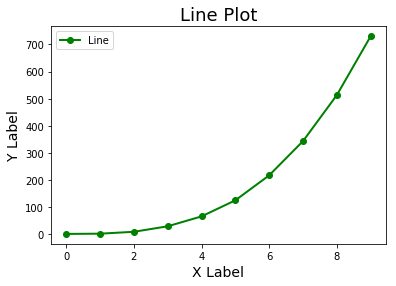

In [5]:
line_graph(xdata=xdata, ydata=ydata, marker='o')

<a name="scatter"></a>

## 散布図
- x軸座標のデータとy軸座標のデータを用意する `xdata, ydata`
- `labels`データ数と同じ数のラベルリストを渡すとラベル付きの散布図になる
- `cmap`を利用するとカラフルな散布図が描けます(colorful_scatter_graph)

#### プロット関数

In [6]:
def scatter_graph(xdata, ydata, labels=None, color='blue',
                                 s=20, marker='o', labelfontsize=14, titlesize=18):
    """
    散布図プロット
    
    Parameters
    --------------
    xdata : ndarray or list
        x座標データ
    
    ydata : ndarray or list
        y座標データ
        
    labels : list or None (default : None)
        点のラベルデータ
    
    color : str
        点の色
    
    s : float
        散布図の点のサイズ
    
    marker : str
        点のマーカー
    
    labelfontsize : float
        x, y軸ラベルのフォントサイズ
    
    titlefontsize : float
        プロットタイトルのフォントサイズ
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    n_data = len(xdata)
    ax.scatter(xdata, ydata, marker=marker, c=color)

    if labels is not None:
        # 各点のラベルをプロット
        for label, x, y in zip(labels, xdata, ydata):
            ax.annotate(
                    label,
                    xy=(x, y),  # 各点にラベルを付加
                    xytext=(5, -5),
                    textcoords='offset points')
            # 文字の位置(xytext)を矢印の先からの相対距離(offset points)で指定

    ax.set_xlabel('X Label', fontsize=labelfontsize)  # x軸の設定
    ax.set_ylabel('Y Label', fontsize=labelfontsize)  # y軸の設定

    # タイトル作成
    ax.set_title('Scatter Plot', fontsize=titlesize)

    plt.show()

In [7]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz'

n_data = 10
xdata = np.arange(n_data)
ydata = func(xdata)
labels = list(ALPHABET[:n_data])

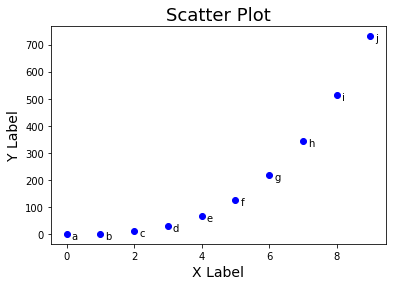

In [8]:
scatter_graph(xdata=xdata, ydata=ydata, labels=labels, color='blue')

In [9]:
def colorful_scatter_graph(xdata, ydata, labels, cmap,
                                                s=20, marker='o', labelfontsize=14, titlesize=18):
    """
    散布図プロット
    
    Parameters
    --------------
    xdata : ndarray or list
        x座標データ
    
    ydata : ndarray or list
        y座標データ
        
    labels : list or None (default : None)
        点のラベルデータ
    
    cmap : matplotlib colormap
        カラーマップオブジェクト
    
    s : float
        散布図の点のサイズ
    
    marker : str
        点のマーカー
    
    labelfontsize : float
        x, y軸ラベルのフォントサイズ
    
    titlefontsize : float
        プロットタイトルのフォントサイズ
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    n_data = len(xdata)
    for i in range(n_data):  # データ点プロット
        ax.scatter(xdata[i], ydata[i], s=s, marker=marker, c=cmap(i/n_data))

    # 各点のラベルをプロット
    for label, x, y in zip(labels, xdata, ydata):
        ax.annotate(
                label,
                xy=(x, y),  # 各点にラベルを付加
                xytext=(5, -5),
                textcoords='offset points')
        # 文字の位置(xytext)を矢印の先からの相対距離(offset points)で指定

    ax.set_xlabel('X Label', fontsize=labelfontsize)  # x軸の設定
    ax.set_ylabel('Y Label', fontsize=labelfontsize)  # y軸の設定

    # タイトル作成
    ax.set_title('Scatter Plot', fontsize=titlesize)

    plt.show()

In [10]:
ALPHABET = 'abcdefghijklmnopqrstuvwxyz'

n_data = 10
xdata = np.arange(n_data)
ydata = func(xdata)
labels = list(ALPHABET[:n_data])

# カラーマップの取得
cmap_name = 'gist_rainbow'
cmap = plt.get_cmap(cmap_name)

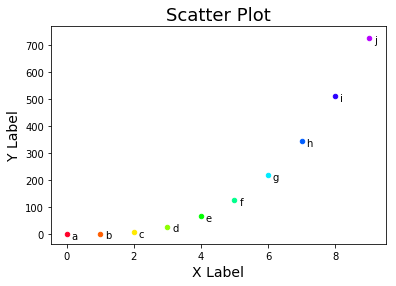

In [11]:
colorful_scatter_graph(xdata=xdata, ydata=ydata, labels=labels, cmap=cmap)

<a name="bar"></a>

## 棒グラフ
- 棒グラフの高さデータを`data`に渡す
- 棒グラフの各カテゴリを`labels`に渡す

In [12]:
def bar_graph(data, labels, color='red'):
    """
    棒グラフ
    
    data : ndarray or list
        棒グラフのデータ
        
    labels : list
        ラベルデータ
    
    color : str
        プロットの色
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    xticks = np.arange(len(labels))  # 棒グラフのx軸を作成
    ax.bar(xticks, data, color=color)  # 棒グラフ作成

    ax.set_ylabel('Y label')  # y軸の設定
    ax.set_ylim([0, 10.5])

    ax.set_title('Bar Graph')  # タイトルの追加

    ax.set_xticks(xticks)  # x軸の設定
    ax.set_xticklabels(labels)  # x軸のラベルに映画名を配置

    plt.show()

In [13]:
n_category = 5
labels = ['Data: %d' % i for i in range(1, n_category+1)]
data = np.random.randint(low=1, high=11, size=n_category)

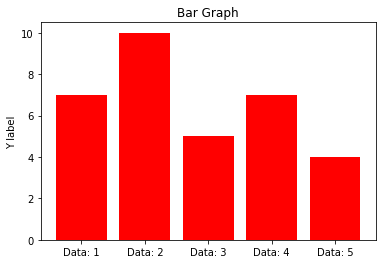

In [14]:
bar_graph(data=data, labels=labels)

<a name="histogram"></a>

## ヒストグラム

In [15]:
def histogram(counter_data):
    """
    1次元ヒストグラム
    
    counter_data : collections.Counter オブジェクト
        キーとデータ数のCounterデータ
    """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    xticks = list(counter_data.keys())
    data = counter_data.values()
    ax.bar(xticks, data, 8)
    ax.set_xlim([-5, 105])  # x軸の設定
    ax.set_xlabel('X Label')
    ax.set_xticks([10 * i for i in range(11)])  # x軸のラベル0, 10, ..., 100

    ax.set_ylim([0, 10])  # y軸の設定
    ax.set_ylabel('Y Label')

    ax.set_title('Histogram')  # タイトルの追加

    plt.show()

In [16]:
from collections import Counter

def decile(data):
    """
    十分位変換
    """
    return (data // 10) * 10


n_students = 20
int_data = np.random.randint(low=0, high=101, size=n_students)
transformed = decile(int_data)
counter_data = Counter(transformed)

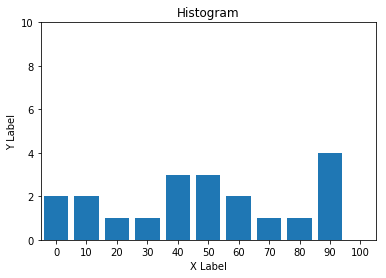

In [17]:
histogram(counter_data=counter_data)

<a name="pcolormesh"></a>
## 2次元プロット

In [18]:
# 第1要素がY軸, 第2要素がX軸となることに注意
X, Y = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 3, 300))
print('X shape:', X.shape)
print('Y shape:', Y.shape)

data = np.sin(2*np.pi*X) * (Y+1) * (3-Y)

X shape: (300, 200)
Y shape: (300, 200)


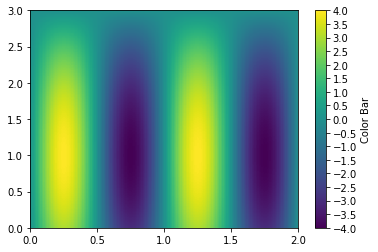

In [19]:
EPSILON = 10**(-8)

def pcolormesh(x_grid, y_grid, data, vmin, vmax, tickstep=0.5):
    """ plot 2D histogram """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    quadmesh = ax.pcolormesh(x_grid, y_grid, data,
                             vmin=vmin, vmax=vmax)  # ヒートマップ作成

    cbar = fig.colorbar(quadmesh, ax=ax)  # カラーバー作成
    cbar.set_label('Color Bar')

    # x軸の設定
    xticks = np.arange(
            x_grid[0, 0],
            x_grid[0, -1]//tickstep * tickstep + EPSILON,
            tickstep)
    ax.set_xticks(xticks)

    # y軸の設定
    yticks = np.arange(
            y_grid[0, 0],
            y_grid[-1, 0]//tickstep * tickstep + EPSILON,
            tickstep)
    ax.set_yticks(yticks)

    # カラーバーの設定
    cticks = np.arange(vmin, vmax + EPSILON, tickstep)
    cbar.set_ticks(cticks)

    plt.show()

pcolormesh(x_grid=X, y_grid=Y, data=data, vmin=-4, vmax=4)

<a name="confusion_matrix"></a>
## 混合行列

In [20]:
y_true = np.array([1, 1, 2, 3, 1, 1, 2, 2, 3, 2, 1])
y_pred = np.array([1, 2, 2, 3, 2, 1, 2, 3, 3, 2, 3])
labels = [1, 2, 3]
name_labels = ['spam', 'ham', 'egg']

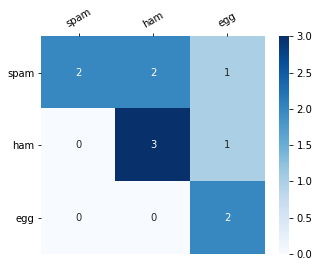

In [21]:
import pandas as pd
import seaborn as sn
from sklearn.metrics import confusion_matrix

def print_cmx(y_true, y_pred, labels, name_labels):
    """ 混同行列 """
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)  # 混合行列を作成, c_ij は真のグループが i で予測グループが j の数を表す

    df_cmx = pd.DataFrame(cmx_data, index=name_labels, columns=name_labels)  # プロット用のpd.DataFrame型

    plt.figure(figsize=(5, 4))
    ax = sn.heatmap(df_cmx, annot=True, fmt='d', cmap='Blues')
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    ax.set_xticklabels(name_labels, rotation=30, ha='center')  # ラベルの再設定
    ax.set_yticklabels(name_labels, rotation=0)
    plt.show()
    return ax

ax = print_cmx(y_true=y_true, y_pred=y_pred, labels=labels, name_labels=name_labels)

In [22]:
sn.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

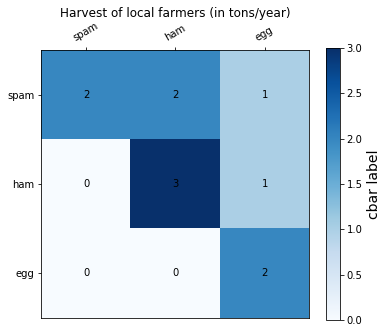

In [23]:
def plot_confusion_matrix(y_true, y_pred, labels,  name_labels):
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)  # 混合行列を作成, c_ij は真のグループが i で予測グループが j の数を表す

    df_cmx = pd.DataFrame(cmx_data, index=name_labels, columns=name_labels)  # プロット用のpd.DataFrame型

    fig = plt.figure(figsize=(6, 5))
    ax = fig.add_subplot(111)
    im = ax.imshow(cmx_data, cmap='Blues')
    
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('cbar label', rotation=90, fontsize=14)
    
    
    # We want to show all ticks...
    ax.set_xticks(np.arange(len(name_labels)))
    ax.set_yticks(np.arange(len(name_labels)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(name_labels, rotation=30)
    ax.set_yticklabels(name_labels)
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)

    # Loop over data dimensions and create text annotations.
    for i in range(len(name_labels)):
        for j in range(len(name_labels)):
            text = ax.text(j, i, cmx_data[i, j],
                           ha="center", va="center", color="black")

    ax.set_title("Harvest of local farmers (in tons/year)", y=1.1)
    
#     fig.tight_layout()
    plt.show()

plot_confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels, name_labels=name_labels)

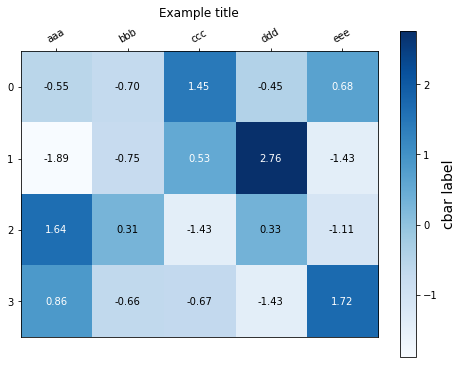

In [24]:
def plot_heatmap(data, index_labels, column_labels, figsize=(8, 6), cmap='Blues',
                                 textcolors=["black", "white"], threshold=None):
    
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111)
    im = ax.imshow(data, cmap=cmap)
    
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max()) / 2
    
    # カラーバー
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.set_ylabel('cbar label', rotation=90, fontsize=14)
    
    # 軸ラベル, タイトル
    ax.set_xticks(np.arange(len(column_labels)))
    ax.set_yticks(np.arange(len(index_labels)))

    ax.set_xticklabels(column_labels, rotation=30)
    ax.set_yticklabels(index_labels)
    
    ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False)
    ax.set_title('Example title', y=1.1)

    # データの値をプロット
    for i in range(len(index_labels)):
        for j in range(len(column_labels)):
            color = textcolors[int(im.norm(data[i, j]) > threshold)]
            text = ax.text(j, i, '{:.2f}'.format(data[i, j]),
                           ha="center", va="center", color=color)

    plt.show()

    
data = np.random.randn(20).reshape(4, 5)
index_labels = [str(i) for i in range(4)]
column_labels = ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
plot_heatmap(data=data, index_labels=index_labels, column_labels=column_labels)

<a name='self_colormap'></a>
## カラーマップ作成

In [25]:
# 第1要素がY軸, 第2要素がX軸となることに注意
X, Y = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 3, 300))
print('X shape:', X.shape)
print('Y shape:', Y.shape)
data = np.sin(2*np.pi*X) * (Y+1) * (3-Y)  # プロットデータ

X shape: (300, 200)
Y shape: (300, 200)


In [26]:
EPSILON = 10**(-8)
def pcolormesh_cmap(x_grid, y_grid, data, vmin, vmax, cmap, tickstep=0.5):
    """ plot 2D histogram """
    fig = plt.figure()
    ax = fig.add_subplot(111)

    quadmesh = ax.pcolormesh(x_grid, y_grid, data, cmap=cmap, vmin=vmin, vmax=vmax)  # ヒートマップ作成

    cbar = fig.colorbar(quadmesh, ax=ax)  # カラーバー作成
    cbar.set_label('Color Bar')
    cticks = np.arange(vmin, vmax + EPSILON, tickstep)
    cbar.set_ticks(cticks)  # カラーバーの設定

    xticks = np.arange(x_grid[0, 0], x_grid[0, -1]//tickstep * tickstep + EPSILON,tickstep)
    ax.set_xticks(xticks)  # x軸の設定

    yticks = np.arange(y_grid[0, 0], y_grid[-1, 0]//tickstep * tickstep + EPSILON, tickstep)
    ax.set_yticks(yticks)  # y軸の設定

    plt.show()

#### 区分で色分けされたカラーマップ

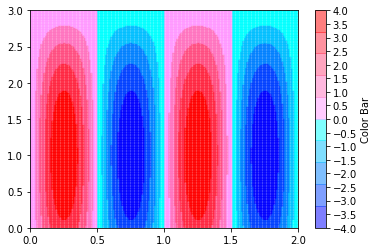

In [27]:
from matplotlib.colors import ListedColormap

color_list = []
cnum = 5
alpha = 0.5
for i in range(cnum):
    color_list.append([0, 1/(cnum-1) * i, 1, alpha])
for i in range(cnum):
    color_list.append([1, 153/255/(cnum-1) * (cnum-1-i),
                       1/(cnum-1) * (cnum-1-i), alpha])
cmap = ListedColormap(color_list)

pcolormesh_cmap(x_grid=X, y_grid=Y, data=data, vmin=-4, vmax=4, cmap=cmap)

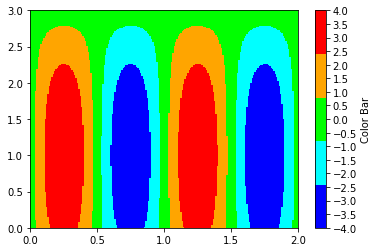

In [28]:
from matplotlib.colors import ListedColormap

color_list = ['Blue', 'Cyan', 'lime', 'Orange', 'Red']

cmap = ListedColormap(color_list)

pcolormesh_cmap(x_grid=X, y_grid=Y, data=data, vmin=-4, vmax=4, cmap=cmap)

#### 線形で繋いだカラーマップ

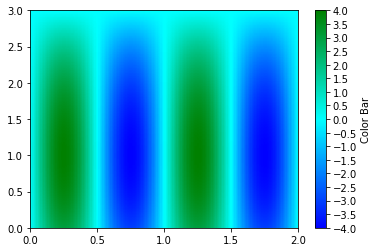

In [29]:
from matplotlib.colors import LinearSegmentedColormap

colorlist = [[0, 'Blue'], [0.5, 'cyan'], [1, 'Green']]
cmap = LinearSegmentedColormap.from_list('mycmap', colorlist)

pcolormesh_cmap(x_grid=X, y_grid=Y, data=data, vmin=-4, vmax=4, cmap=cmap)

### [トップへ](#top)